### WHO TB Data Analysis

#### Introduction

This analsyis is done on WHO TB Burden data set. The project is headed by Pineapple with Mango supporting.
We have started with simple desctiptive statistics to better understand the data.

###### Importing libraries

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')



###### Simple descriptive statistics . 

First we load the data and select only the column we need (Smart pineapple suggested this)

Let us first get the first and the last rows of the entire TB data set

In [4]:
all_tb = pd.read_csv ('~/Downloads/TB_burden_countries_2019-01-11.csv', encoding = 'utf-8')

#Selecting required columns

all_tb = all_tb[['country', 'year', 'e_inc_num', 'e_pop_num']] 

all_tb.head()


,country,year,e_inc_num,e_pop_num
0,Afghanistan,2000,38000,20093756
1,Afghanistan,2001,40000,20966463
2,Afghanistan,2002,42000,21979923
3,Afghanistan,2003,44000,23064851
4,Afghanistan,2004,46000,24118979


In [5]:
all_tb.tail()

,country,year,e_inc_num,e_pop_num
3845,Zimbabwe,2013,46000,15054506
3846,Zimbabwe,2014,43000,15411675
3847,Zimbabwe,2015,38000,15777451
3848,Zimbabwe,2016,38000,16150362
3849,Zimbabwe,2017,37000,16529904


After checking the head and tails , Mango went ahead and described the data using the pandas describe function to get more insight of the data set.


In [6]:
all_tb.describe()

,year,e_inc_num,e_pop_num
count,3850.000000,3.850000e+03,3.850000e+03
mean,2008.543377,4.945711e+04,3.185015e+07
std,5.187201,2.354946e+05,1.275250e+08
min,2000.000000,0.000000e+00,1.126000e+03
25%,2004.000000,2.200000e+02,7.241052e+05
50%,2009.000000,3.000000e+03,5.613306e+06
75%,2013.000000,1.700000e+04,2.019158e+07
max,2017.000000,3.190000e+06,1.409517e+09


We need to measure the rate of TB in country population, therefore we divide the number of incident cases with the poplulation and create new column perc_rate_country_population

In [7]:
all_tb['perc_rate_country_population'] = (all_tb['e_inc_num']/all_tb['e_pop_num'] * 100) . round(2)
all_tb.head()


,country,year,e_inc_num,e_pop_num,perc_rate_country_population
0,Afghanistan,2000,38000,20093756,0.19
1,Afghanistan,2001,40000,20966463,0.19
2,Afghanistan,2002,42000,21979923,0.19
3,Afghanistan,2003,44000,23064851,0.19
4,Afghanistan,2004,46000,24118979,0.19


We need to group by country and do a mean and count of perc_rate_country_population

In [8]:
summary= all_tb.groupby (['country']).perc_rate_country_population.mean() . reset_index()
summary.head()

,country,perc_rate_country_population
0,Afghanistan,0.190000
1,Albania,0.020000
2,Algeria,0.075000
3,American Samoa,0.009444
4,Andorra,0.011667


In [9]:
summary_2 = all_tb.groupby (['country']).perc_rate_country_population.agg({("avarage_rate", "mean"),("Count", "count")})
summary_2.head()

,Count,avarage_rate
country,,
Afghanistan,18,0.190000
Albania,18,0.020000
Algeria,18,0.075000
American Samoa,18,0.009444
Andorra,18,0.011667


Finally we did a histogram of perc_rate_country_population

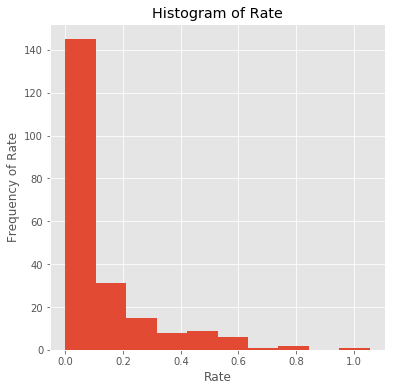

In [10]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis
summary['perc_rate_country_population'].plot.hist()
ax.set_title('Histogram of Rate') # Give the plot a main title
ax.set_xlabel("Rate") # Set text for the x axis
ax.set_ylabel("Frequency of Rate") # Set text for the x axis
plt.show()